# # Bank Customer Churn Model

# objective
The main objective of this model is to predict which customers are likely to leave the bank. This can be done by using machine learning algorithms to analyze customer data, such as account balance, transaction history, and demographics. The model can then be used to identify customers who are at risk of churning, so that the bank can take steps to prevent them from leaving.



In [54]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


# import data 

In [5]:
df= pd.read_csv('https://github.caaom/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

# analysing the data / describing data 

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [8]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df.duplicated('CustomerId').sum()

0

In [11]:
df=df.set_index('CustomerId')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# encoding

In [15]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
df.replace({'Geography':{'France':2,'Germany':1,'Spain':0}}, inplace=True)

In [18]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [20]:
df.replace({'Gender': {'Male':0,'Female':0}}, inplace=True)

In [24]:
df['Num Of Products'].value_counts()

1    5084
2    4590
3     266
4      60
Name: Num Of Products, dtype: int64

In [26]:
df.replace({'Num Of Products': {1:0,2:1,3:1,4:1}}, inplace=True)

In [28]:
df['Has Credit Card'].value_counts()

1    7055
0    2945
Name: Has Credit Card, dtype: int64

In [29]:
df['Is Active Member'].value_counts()

1    5151
0    4849
Name: Is Active Member, dtype: int64

In [33]:
df.loc[(df['Balance']==0),'Churn'].value_counts()

0    3117
1     500
Name: Churn, dtype: int64

# data visualization

In [36]:
df['Zero Balance']=np.where(df['Balance']>0,1,0)

<AxesSubplot:>

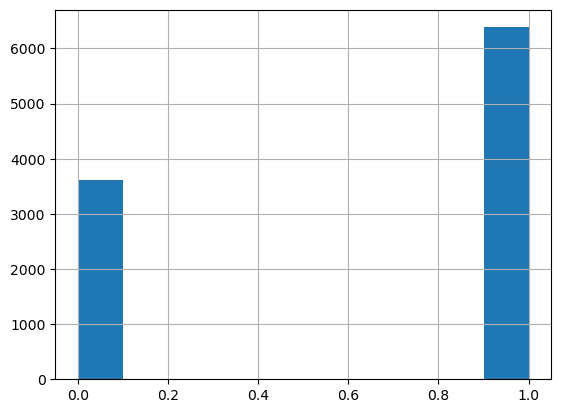

In [37]:
df['Zero Balance'].hist()

In [38]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

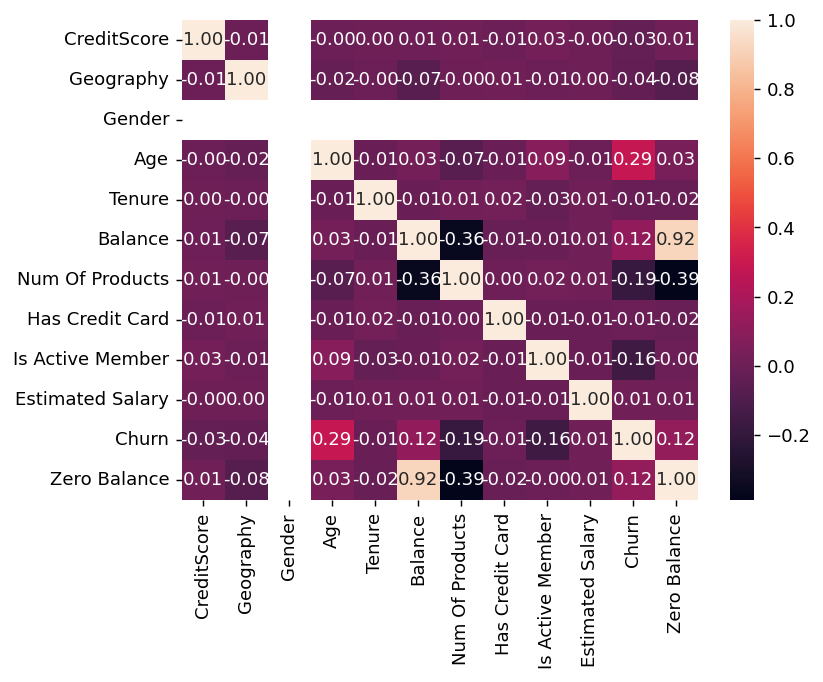

In [86]:
#correlation 
corr = df.corr()
 
plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

# define labels and features

In [40]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

# define  target variable(y) and feature variable (X)

In [41]:
X = df.drop(['Surname','Churn'],axis=1)

In [42]:
y = df['Churn']

In [43]:
X.shape, y.shape

((10000, 11), (10000,))

In [44]:
df['Churn'].value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

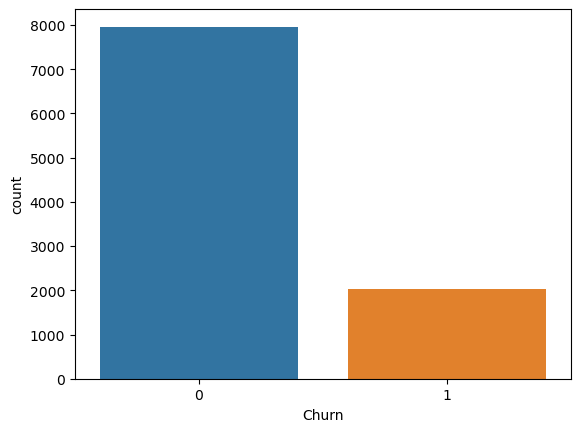

In [45]:
sns.countplot(x='Churn', data = df);

In [46]:
X.shape, y.shape

((10000, 11), (10000,))

# Train test split

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=2529)

In [59]:
X_train.shape, y_train.shape, X.shape, y.shape

((8000, 11), (8000,), (10000, 11), (10000,))

In [60]:
y.value_counts()

0    7963
1    2037
Name: Churn, dtype: int64

In [61]:
y_train.value_counts()

0    6360
1    1640
Name: Churn, dtype: int64

<AxesSubplot:ylabel='Frequency'>

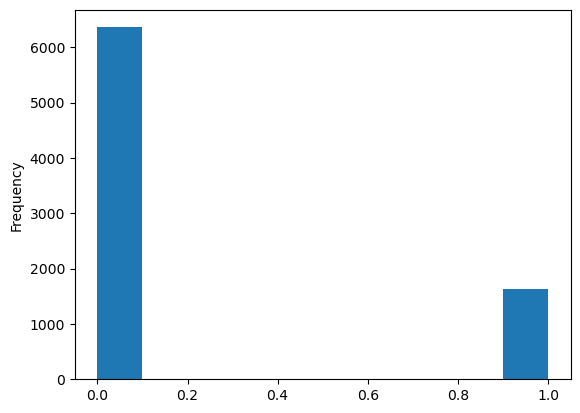

In [87]:
y_train.plot(kind = 'hist')

# Modeling 

In [63]:
#standardize features 
from sklearn.preprocessing import StandardScaler

In [65]:
sc = StandardScaler()

# support vector machine classifier 

In [69]:
from sklearn.svm import SVC

In [71]:
svc = SVC()

In [72]:
svc.fit(X_train, y_train)

SVC()

In [73]:
y_pred = svc.predict(X_test)

# model accuracy 

In [75]:
from sklearn.metrics import confusion_matrix, classification_report

In [76]:
confusion_matrix(y_test,y_pred)

array([[1603,    0],
       [ 397,    0]], dtype=int64)

In [94]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1603
           1       0.00      0.00      0.00       397

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# model evaluation

In [98]:
from sklearn.linear_model import LinearRegression

# model evaluation

In [112]:
model = LinearRegression()

In [113]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [114]:
# Evaluate the model
print(model.score(X_test, y_test))

0.15811566102621488


# model prdection

In [106]:
y_pred = model.predict(X_test)
y_pred

array([ 0.11994749,  0.23603792,  0.40068528, ...,  0.29102755,
        0.00590035, -0.03706831])

# Explanation
A bank customer churn model is a machine learning model that predicts which customers are likely to leave the bank. This can be done by using machine learning algorithms to analyze customer data, such as account balance, transaction history, and demographics. The model can then be used to identify customers who are at risk of churning, so that the bank can take steps to prevent them from leaving.

steps involved to build this model using ml:

    >collect data 
    >clean and prepare the data 
    >choose a ML algorithm
    >Train the model 
    >Evaluate the model 
    >Deploy the model
    
Here are some benefits of using ML to build bank customer churn model:

    >Accuracy 
    >cost-effectiveness
    >Scalability

In [111]:
# This project was completely made by cheedella yasasvi